<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220228_KNN_accuracy_overfitting_best_n_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2] # length, width 컬럼만 가져오자 : data
y = iris.target # 레이블 : target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=30)
# test_size = 0.25(default)
# shuffle = True(default)
# stratify = None(default) : target으로 지정시 class비율을 train/validation에 유지

### 1. 정확도 직접 구하기(prediction==y_valid)

In [5]:
clf = KNeighborsClassifier() # 모델 정의
clf.fit(x_train, y_train) # 학습 : 데이터와 레이블 매칭(fit)
prediction = clf.predict(x_test) # 학습된 데이터/레이블에 검증데이터(x_test) 넣어서 어떤레이블이 나오는지 보자
prediction

array([0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2])

In [6]:
prediction == y_test

array([ True,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
        True,  True])

In [7]:
(prediction == y_test).mean() # 76.3%

0.7631578947368421

### 2. 정확도 score 메소드로 구하기(KNeighborsClassifier.score())

In [8]:
clf.score(x_test, y_test) # clf.fit()을 통해 이미 학습되어 있는 상태에서 clf.score()

0.7631578947368421

# overfitting 여부 확인

In [9]:
print("학습데이터의 정확도    : {0:.3f}".format(clf.score(x_train, y_train)))
print("검증데이터의 정확도    : {0:.3f}".format((prediction==y_test).mean()))
# 학습된 데이터/레이블에 똑같은 학습데이터를 넣어도 100% 정확도가 안나오네...
# KNN에 따라 바운더리가 형성되며, 과적합(Overfitting)인 경우 : 학습데이터 Accuracy > 검증데이터 Accuracy

학습데이터의 정확도    : 0.830
검증데이터의 정확도    : 0.763


n_neighbors개수가 적은경우 결정경계 복잡 : Overfitting

n_neighbors개수가 많은경우 결정경계 단순 : underfitting

In [11]:
train_acc = []
test_acc = []

for n in range(1, 15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n) # 1.모델 정의
    clf.fit(x_train, y_train) # 2.모델 학습(학습할데이터, 학습할데이터의레이블)
    prediction = clf.predict(x_test) # 모델 검증(검증할데이터) → 학습된 데이터에 따라 예상되는 레이블
    train_acc.append(clf.score(x_train, y_train)) # 함수로 정확도 확인(데이터, 레이블)
    test_acc.append((prediction==y_test).mean())

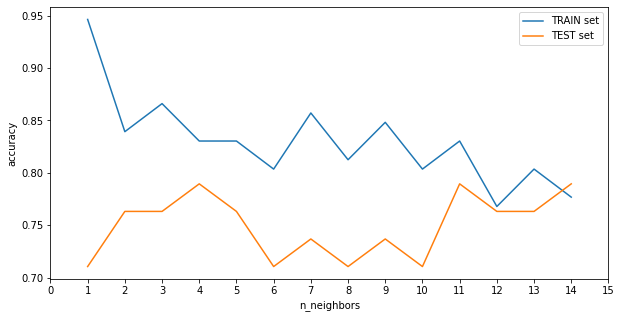

In [15]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1)) # plt(x=)에 따라 임의의 간격으로 표시된 x축의 ticks를 직접설정
plt.legend() # plt(label=) 에 표현된 레이블을 범례로 표시

n_neighbors가 11인경우 test set의 정확도가 가장 높게 나왔음. 따라서 n_neighbors=11이 최적값

train set의 정확도가 가장 높다고 좋은것이 아니다.
과적합의 가능성이 높기 때문